In [1]:
# only need to run this once 
!pip install opencv-contrib-python


In [2]:
import cv2 as cv2
import numpy as np

In [3]:
img = cv2.imread('/media/data_16T/chloe/sidewalkai/massave.png')
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray_img, (7, 7), 0)
threshold = cv2.threshold(blurred, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
analysis = cv2.connectedComponentsWithStats(threshold,
											4,
											cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis

In [4]:
# Initialize a new image to store
# all the output components
output = np.zeros(gray_img.shape, dtype="uint8")

In [5]:
for i in range(1, totalLabels):
    	
	# Area of the component
	area = values[i, cv2.CC_STAT_AREA]
	
	if (area > 140) and (area < 400):
		componentMask = (label_ids == i).astype("uint8") * 255
		output = cv2.bitwise_or(output, componentMask)

In [15]:
def imshowy(template):
    plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

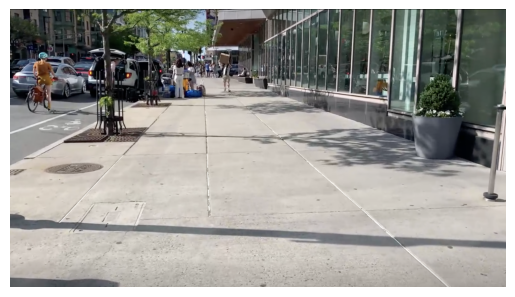

In [14]:
# image = cv2.imread('/media/data_16T/chloe/sidewalkai/massave.png')

# Display the image using the defined imshow function
imshowy(img)

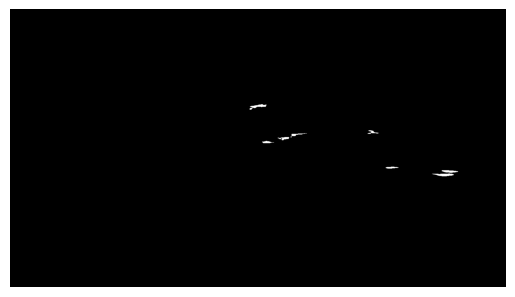

In [16]:
imshowy(output)

In [2]:
# Loop through each component

cv2.imshow("Image", img)
cv2.imshow("Filtered Components", output)
cv2.waitKey(0)



: 

: 